In [238]:
# Importing Libs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
plt.rcParams['figure.figsize'] = [12, 7]

In [240]:
df = pd.read_csv('../enc_devs_py.csv')

In [241]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Modalidad
---
- Modalidad de trabajo de los encuestados.

In [242]:
# Cantidad de respuestas.
df['Modalidad'].shape

(342,)

In [243]:
# Conteo de respuestas vacias.
df['Modalidad'].isna().sum()

0

In [244]:
df['Modalidad'].value_counts()

Remoto                       145
Hibrído                      110
Presencial                    78
Ninguna de las anteriores      9
Name: Modalidad, dtype: int64

In [245]:
df['Modalidad'].value_counts(normalize=True)

Remoto                       0.423977
Hibrído                      0.321637
Presencial                   0.228070
Ninguna de las anteriores    0.026316
Name: Modalidad, dtype: float64

<AxesSubplot:title={'center':'Modalidad de Trabajo'}>

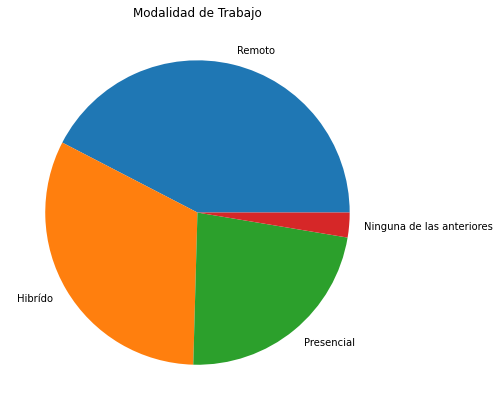

In [246]:
df['Modalidad'].value_counts(normalize=True).plot(
    kind = 'pie',
    title = 'Modalidad de Trabajo',
    ylabel = '')

In [247]:
df['Modalidad'].value_counts().keys()

Index(['Remoto', 'Hibrído', 'Presencial', 'Ninguna de las anteriores'], dtype='object')

In [248]:
df['Modalidad'].replace({
    'Ninguna de las anteriores':'Ninguna'
}, inplace =True)

In [249]:
df['Modalidad'].value_counts().keys()

Index(['Remoto', 'Hibrído', 'Presencial', 'Ninguna'], dtype='object')

# Modalidad de trabajo por genero.
---

In [250]:
df['Género'].value_counts().keys()

Index(['Hombre', 'Mujer', 'Prefiero no compartir', 'Otros', 'Género'], dtype='object')

## Genero no definido.

In [251]:
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad']

0       Remoto
78     Hibrído
146    Ninguna
147     Remoto
158     Remoto
301     Remoto
Name: Modalidad, dtype: object

In [252]:
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad'].value_counts()

Remoto     4
Ninguna    1
Hibrído    1
Name: Modalidad, dtype: int64

In [253]:
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad'].isna().sum()

0

<AxesSubplot:title={'center':'Genero Indefinido - Modalidad de Trabajo'}>

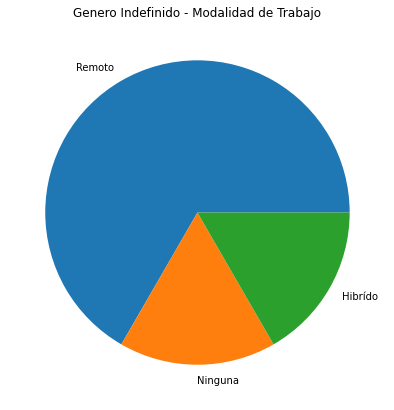

In [254]:
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad'].value_counts(normalize=True).plot(
    kind='pie',
    title='Genero Indefinido - Modalidad de Trabajo',
    ylabel = '')

## Hombres

In [255]:
df.groupby('Género').get_group('Hombre')['Modalidad'].value_counts()

Remoto        117
Hibrído        94
Presencial     60
Ninguna         8
Name: Modalidad, dtype: int64

In [256]:
df.groupby('Género').get_group('Hombre')['Modalidad'].value_counts(normalize=True)

Remoto        0.419355
Hibrído       0.336918
Presencial    0.215054
Ninguna       0.028674
Name: Modalidad, dtype: float64

/home/torrezmn/Documents/DS_ENV/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:title={'center':'Modalidad de Trabajo de Hombres'}>

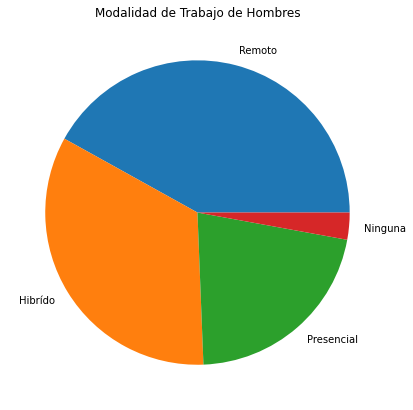

In [257]:
df.groupby('Género').get_group('Hombre')['Modalidad'].value_counts(normalize=True).plot(
    kind = 'pie',
    title = 'Modalidad de Trabajo de Hombres', 
    ylabel = '')

## Mujer

In [258]:
df.groupby('Género').get_group('Mujer')['Modalidad'].value_counts()

Remoto        20
Presencial    18
Hibrído       11
Name: Modalidad, dtype: int64

In [259]:
df.groupby('Género').get_group('Mujer')['Modalidad'].value_counts(normalize=True)

Remoto        0.408163
Presencial    0.367347
Hibrído       0.224490
Name: Modalidad, dtype: float64

<AxesSubplot:title={'center':'Modalidad de trabajo de mujeres.'}>

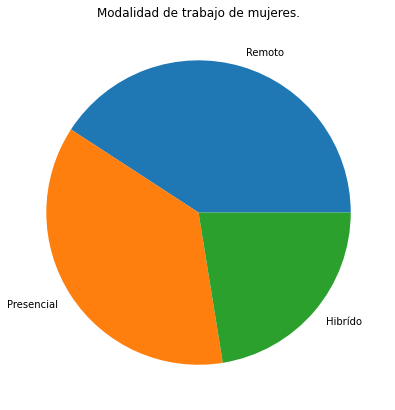

In [260]:
df.groupby('Género').get_group('Mujer')['Modalidad'].value_counts(normalize=True).plot(
    kind='pie',
    title='Modalidad de trabajo de mujeres.',
    ylabel='')

## COMPARATIVA TODOS LOS GENEROS

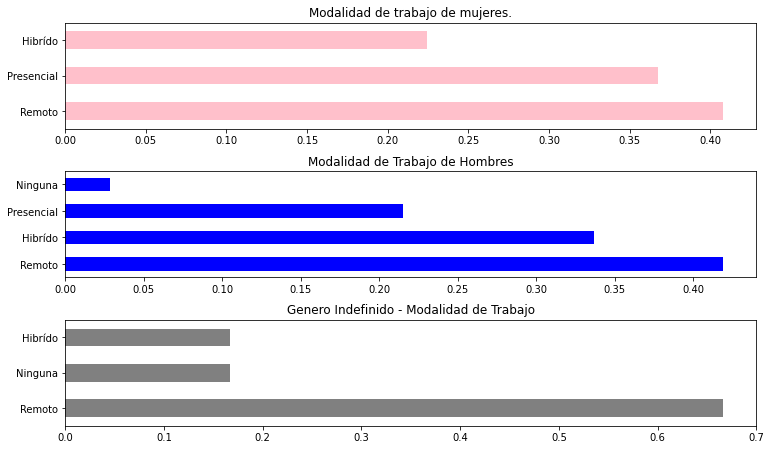

In [261]:
plt.figure() 
plt.subplot(3,1,1)


df.groupby('Género').get_group('Mujer')['Modalidad'].value_counts(normalize=True).plot(
    kind='barh',
    title='Modalidad de trabajo de mujeres.',
    ylabel='',
    color='pink'
    )


plt.subplot(3,1,2)
df.groupby('Género').get_group('Hombre')['Modalidad'].value_counts(normalize=True).plot(
    kind = 'barh',
    title = 'Modalidad de Trabajo de Hombres', 
    ylabel = '',
    color='blue')

plt.subplot(3,1,3)
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad'].value_counts(normalize=True).plot(
    kind='barh',
    title='Genero Indefinido - Modalidad de Trabajo',
    ylabel = '',
    color='gray',
    )


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Modalida de Trabajo por edad
---

In [262]:
df['Edad actual '].value_counts()

30 a 34 años    120
25 a 29 años     98
35 a 39 años     51
20 a 24 años     42
40 a 44 años     16
15 a 19 años      6
50 a 54 años      3
55 a 59 años      3
45 a 49 años      3
Name: Edad actual , dtype: int64

In [263]:
df['Edad actual '].isna().sum()

0

In [264]:
grupos_etarios = [i for i in df['Edad actual '].value_counts().keys()]

In [265]:
# df.loc[df['Edad actual '] == '30 a 34 años'].shape[0]

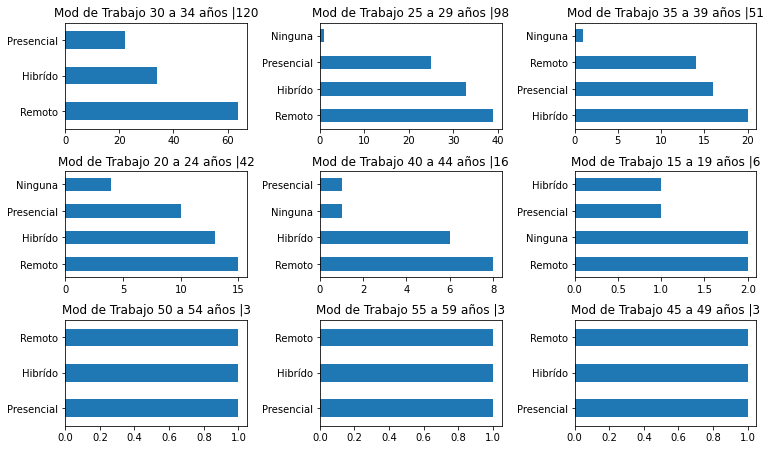

In [266]:
plt.figure() 

for k,v in enumerate(grupos_etarios):
    plt.subplot(3,3,k+1)
    df.groupby('Edad actual ').get_group(v)['Modalidad'].value_counts().plot(
        kind='barh',
        title='Mod de Trabajo {0} |{1}'.format(v,df.loc[df['Edad actual '] == v].shape[0]))
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Modalidad segun Salario mensual
---

In [267]:
df['Modalidad'].value_counts().keys()

Index(['Remoto', 'Hibrído', 'Presencial', 'Ninguna'], dtype='object')

In [268]:
df.groupby('Modalidad').get_group('Remoto')['Salario mensual'].value_counts()

Entre 5.000.000 a 7.000.000 gs              27
Entre 3.500.000 a 5.000.000 gs              22
Entre 7.000.000 a 9.000.000 gs              19
Entre 9.000.000 a 12.000.000 gs             18
Más de 27.000.000 gs                        15
Entre 2.192.839 gs a 3.500.000 gs           11
Entre 12.000.000 a 15.000.000 gs             7
Menos del salario mínimo ( 2.192.839 gs)     7
Entre 15.000.000 a 18.000.000 gs             6
Entre 18.000.000 a 21.000.000 gs             5
Entre 21.000.000 a 24.000.000 gs             3
Entre 24.000.000 a 27.000.000 gs             3
Salario mínimo 2.192.839 gs                  2
Name: Salario mensual, dtype: int64

In [269]:
df.groupby('Modalidad').get_group('Hibrído')['Salario mensual'].value_counts()

Entre 5.000.000 a 7.000.000 gs              20
Entre 12.000.000 a 15.000.000 gs            16
Entre 7.000.000 a 9.000.000 gs              15
Entre 9.000.000 a 12.000.000 gs             15
Entre 3.500.000 a 5.000.000 gs              14
Entre 2.192.839 gs a 3.500.000 gs           11
Entre 15.000.000 a 18.000.000 gs             7
Entre 21.000.000 a 24.000.000 gs             3
Entre 18.000.000 a 21.000.000 gs             3
Menos del salario mínimo ( 2.192.839 gs)     2
Salario mínimo 2.192.839 gs                  2
Más de 27.000.000 gs                         1
Entre 24.000.000 a 27.000.000 gs             1
Name: Salario mensual, dtype: int64

In [270]:
df.groupby('Modalidad').get_group('Presencial')['Salario mensual'].value_counts()

Entre 7.000.000 a 9.000.000 gs       16
Entre 2.192.839 gs a 3.500.000 gs    15
Entre 5.000.000 a 7.000.000 gs       14
Entre 9.000.000 a 12.000.000 gs      12
Entre 3.500.000 a 5.000.000 gs        9
Entre 12.000.000 a 15.000.000 gs      5
Salario mínimo 2.192.839 gs           4
Entre 15.000.000 a 18.000.000 gs      1
Entre 21.000.000 a 24.000.000 gs      1
Entre 18.000.000 a 21.000.000 gs      1
Name: Salario mensual, dtype: int64

In [271]:
df.groupby('Modalidad').get_group('Ninguna')['Salario mensual'].value_counts()

Menos del salario mínimo ( 2.192.839 gs)    4
Entre 2.192.839 gs a 3.500.000 gs           2
Más de 27.000.000 gs                        1
Entre 3.500.000 a 5.000.000 gs              1
Entre 5.000.000 a 7.000.000 gs              1
Name: Salario mensual, dtype: int64

In [272]:
df.columns

Index(['Marca temporal', 'Modalidad', 'Trabajo', 'Tipo de trabajo', 'DevOps',
       'Codificar por trabajo', 'Experiencia en TI',
       'Experiencia en codificación ',
       'Primera línea de código en una máquina', 'Educación',
       'Carreras o especialidades', 'Importancia educación formal', 'Género',
       'Edad actual ', 'Salario mensual',
       'Programación, scripting y lenguajes de marcado',
       'Librerías o web frameworks',
       'Otras frameworks, librerías y herramientas', 'Base de datos',
       'Plataformas', 'Lenguaje favorito', 'Lenguaje más odiado',
       'Framework favorito', 'Framework más odiado', 'Herramientas'],
      dtype='object')

# Modalidad de Trabajo segun Educacion

In [273]:
df.columns

Index(['Marca temporal', 'Modalidad', 'Trabajo', 'Tipo de trabajo', 'DevOps',
       'Codificar por trabajo', 'Experiencia en TI',
       'Experiencia en codificación ',
       'Primera línea de código en una máquina', 'Educación',
       'Carreras o especialidades', 'Importancia educación formal', 'Género',
       'Edad actual ', 'Salario mensual',
       'Programación, scripting y lenguajes de marcado',
       'Librerías o web frameworks',
       'Otras frameworks, librerías y herramientas', 'Base de datos',
       'Plataformas', 'Lenguaje favorito', 'Lenguaje más odiado',
       'Framework favorito', 'Framework más odiado', 'Herramientas'],
      dtype='object')

# Modalidad segun tipo de trabajo

In [274]:
modalidad = [i for i in df['Modalidad'].value_counts().keys()]
modalidad

['Remoto', 'Hibrído', 'Presencial', 'Ninguna']

### Tipo de trabajo MODALIDAD REMOTA

In [275]:
df.groupby('Modalidad').get_group('Remoto')['Tipo de trabajo']

0                                           QA o testing
4                                   Desarrollador mobile
5                                   Desarrollador mobile
6         Desarrollador back-end;Desarrollador front-end
8                                 Desarrollador back-end
                             ...                        
329           Aplicaciones de escritorio o empresariales
332                             Desarrollador full-stack
333    Desarrollador de sistemas embebidos;Aplicacion...
334    Desarrollador back-end;Desarrollador front-end...
337    Desarrollador full-stack;Aplicaciones de escri...
Name: Tipo de trabajo, Length: 145, dtype: object

In [276]:
tipo_trabajo_remoto = {}
def set_tipo_trabajo_remoto(tipo):
    for i in tipo.split(';'):
        tipo_trabajo_remoto[i]=0
        
def count_tipo_trabajo_remoto(tipo):
    for i in tipo.split(';'):
        tipo_trabajo_remoto[i]+=1
    

In [277]:
df.groupby('Modalidad').get_group('Remoto')['Tipo de trabajo'].map(set_tipo_trabajo_remoto)
df.groupby('Modalidad').get_group('Remoto')['Tipo de trabajo'].map(count_tipo_trabajo_remoto)

0      None
4      None
5      None
6      None
8      None
       ... 
329    None
332    None
333    None
334    None
337    None
Name: Tipo de trabajo, Length: 145, dtype: object

In [278]:
pd.DataFrame(
    data = tipo_trabajo_remoto.items(), 
    columns = ['trabajo','conteo']).set_index('trabajo')

,conteo
trabajo,
QA o testing,10
Desarrollador mobile,26
Desarrollador back-end,56
Desarrollador front-end,48
Desarrollador full-stack,68
Desarrollador de sistemas embebidos,7
Administrador de base de datos,21
Project Leader,22
Desarrollador de videojuegos,4


### Tipo de trabajo MODALIDAD HIBRIDA

In [279]:
df.groupby('Modalidad').get_group('Hibrído')['Tipo de trabajo']

1      Desarrollador full-stack;Aplicaciones de escri...
2                                Desarrollador front-end
3                               Desarrollador full-stack
10                              Desarrollador full-stack
15     Desarrollador back-end;Desarrollador mobile;Ap...
                             ...                        
327           Aplicaciones de escritorio o empresariales
328    Desarrollador full-stack;Aplicaciones de escri...
330    Aplicaciones de escritorio o empresariales;Adm...
336                             Desarrollador full-stack
341    Desarrollador back-end;Desarrollador front-end...
Name: Tipo de trabajo, Length: 110, dtype: object

In [280]:
tipo_trabajo_hibrido = {}

def set_tipo_trabajo_hibrido(tipo):
    for i in tipo.split(';'):
        tipo_trabajo_hibrido[i]=0
def count_tipo_trabajo_hibrido(tipo):
    for i in tipo.split(';'):
        tipo_trabajo_hibrido[i]+=1

In [281]:
df.groupby('Modalidad').get_group('Hibrído')['Tipo de trabajo'].map(set_tipo_trabajo_hibrido)
df.groupby('Modalidad').get_group('Hibrído')['Tipo de trabajo'].map(count_tipo_trabajo_hibrido)

1      None
2      None
3      None
10     None
15     None
       ... 
327    None
328    None
330    None
336    None
341    None
Name: Tipo de trabajo, Length: 110, dtype: object

In [282]:
tipo_trabajo_hibrido

{'Desarrollador full-stack': 51,
 'Aplicaciones de escritorio o empresariales': 29,
 'Project Leader': 27,
 'Desarrollador front-end': 25,
 'Desarrollador back-end': 46,
 'Desarrollador mobile': 17,
 'Desarrollador de sistemas embebidos': 8,
 'QA o testing': 16,
 'Administrador de base de datos': 28}

In [283]:
pd.DataFrame(
    data = tipo_trabajo_hibrido.items(), 
    columns = ['trabajo','conteo']).set_index('trabajo')

,conteo
trabajo,
Desarrollador full-stack,51
Aplicaciones de escritorio o empresariales,29
Project Leader,27
Desarrollador front-end,25
Desarrollador back-end,46
Desarrollador mobile,17
Desarrollador de sistemas embebidos,8
QA o testing,16
Administrador de base de datos,28


### Tipo de trabajo MODALIDAD PRESENCIAL

In [284]:
df.groupby('Modalidad').get_group('Presencial')['Tipo de trabajo']

7                                 Desarrollador back-end
11                               Desarrollador front-end
12     Desarrollador full-stack;Aplicaciones de escri...
13     Desarrollador back-end;Desarrollador front-end...
18     Desarrollador full-stack;Administrador de base...
                             ...                        
331    Desarrollador back-end;Desarrollador front-end...
335    Desarrollador back-end;Administrador de base d...
338                                         QA o testing
339    Desarrollador de sistemas embebidos;Aplicacion...
340           Aplicaciones de escritorio o empresariales
Name: Tipo de trabajo, Length: 78, dtype: object

In [285]:
tipo_trabajo_presencial = {}
def set_tipo_trabajo_presencial(tipo):
    for i in tipo.split(';'):
        tipo_trabajo_presencial[i]=0
def count_tipo_trabajo_presencial(tipo):
    for i in tipo.split(';'):
        tipo_trabajo_presencial[i]+=1

In [286]:
df.groupby('Modalidad').get_group('Presencial')['Tipo de trabajo'].map(set_tipo_trabajo_presencial)
df.groupby('Modalidad').get_group('Presencial')['Tipo de trabajo'].map(count_tipo_trabajo_presencial)

7      None
11     None
12     None
13     None
18     None
       ... 
331    None
335    None
338    None
339    None
340    None
Name: Tipo de trabajo, Length: 78, dtype: object

In [287]:
tipo_trabajo_presencial

{'Desarrollador back-end': 32,
 'Desarrollador front-end': 24,
 'Desarrollador full-stack': 41,
 'Aplicaciones de escritorio o empresariales': 27,
 'Administrador de base de datos': 22,
 'Desarrollador mobile': 13,
 'QA o testing': 7,
 'Project Leader': 12,
 'Desarrollador de sistemas embebidos': 8}

In [288]:
pd.DataFrame(
    data = tipo_trabajo_presencial.items(), 
    columns = ['trabajo','conteo']).set_index('trabajo')

,conteo
trabajo,
Desarrollador back-end,32
Desarrollador front-end,24
Desarrollador full-stack,41
Aplicaciones de escritorio o empresariales,27
Administrador de base de datos,22
Desarrollador mobile,13
QA o testing,7
Project Leader,12
Desarrollador de sistemas embebidos,8


### Tipo de trabajo MODALIDAD NINGUNA

In [289]:
df.groupby('Modalidad').get_group('Ninguna')['Tipo de trabajo']

29                               Desarrollador front-end
100           Aplicaciones de escritorio o empresariales
146    Desarrollador back-end;Desarrollador front-end...
151                              Desarrollador front-end
170         Desarrollador front-end;Desarrollador mobile
255                             Desarrollador full-stack
319           Aplicaciones de escritorio o empresariales
320    Desarrollador back-end;Aplicaciones de escrito...
325                              Desarrollador front-end
Name: Tipo de trabajo, dtype: object

In [290]:
tipo_trabajo_ninguna = {}
def set_trabajo_ninguno(tipo):
    for i in tipo.split(';'):
        tipo_trabajo_ninguna[i]=0      
def count_trabajo_ninguno(tipo):
    for i in tipo.split(';'):
        tipo_trabajo_ninguna[i]+=1   

In [291]:
df.groupby('Modalidad').get_group('Ninguna')['Tipo de trabajo'].map(set_trabajo_ninguno)
df.groupby('Modalidad').get_group('Ninguna')['Tipo de trabajo'].map(count_trabajo_ninguno)

29     None
100    None
146    None
151    None
170    None
255    None
319    None
320    None
325    None
Name: Tipo de trabajo, dtype: object

In [292]:
tipo_trabajo_ninguna

{'Desarrollador front-end': 5,
 'Aplicaciones de escritorio o empresariales': 4,
 'Desarrollador back-end': 2,
 'Desarrollador full-stack': 2,
 'Desarrollador de sistemas embebidos': 1,
 'Administrador de base de datos': 1,
 'Project Leader': 1,
 'Desarrollador mobile': 1}

In [293]:
pd.DataFrame(
    data = tipo_trabajo_ninguna.items(), 
    columns = ['trabajo','conteo']).set_index('trabajo')

,conteo
trabajo,
Desarrollador front-end,5
Aplicaciones de escritorio o empresariales,4
Desarrollador back-end,2
Desarrollador full-stack,2
Desarrollador de sistemas embebidos,1
Administrador de base de datos,1
Project Leader,1
Desarrollador mobile,1


<Figure size 864x504 with 0 Axes>

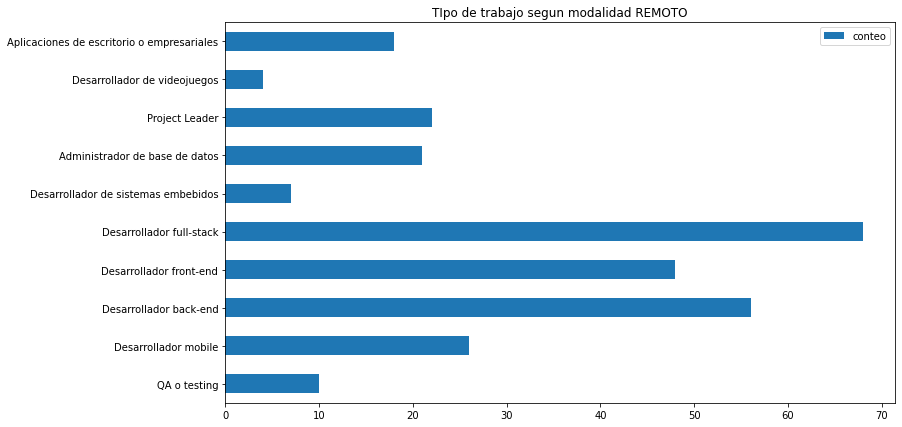

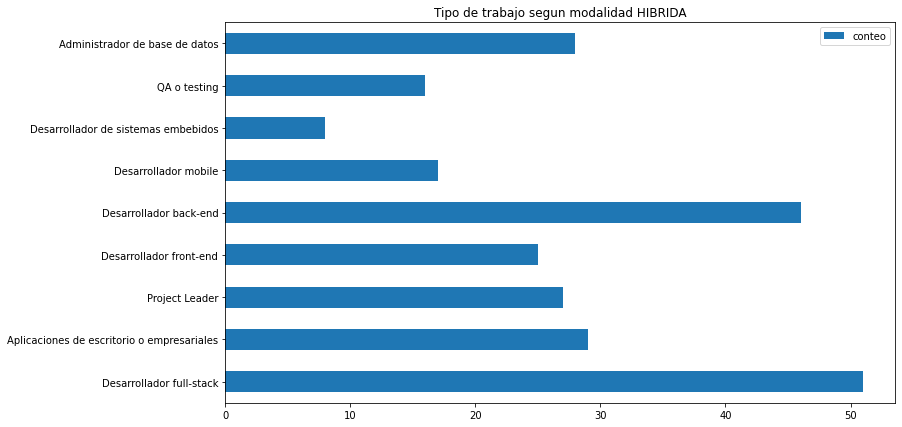

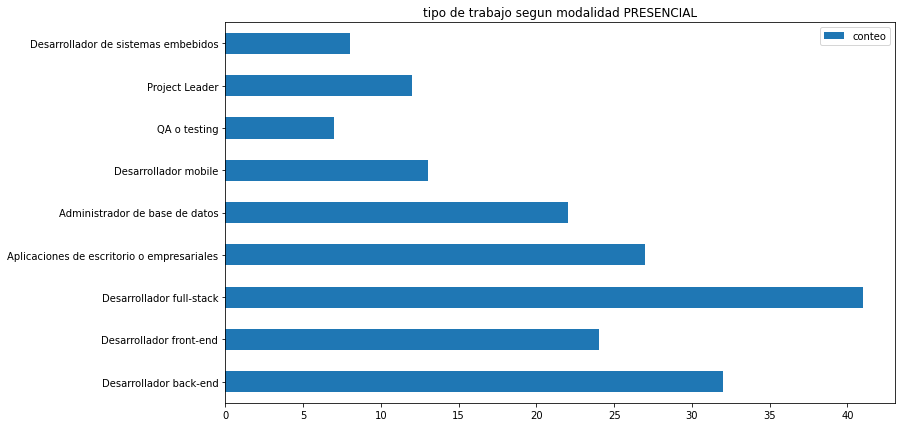

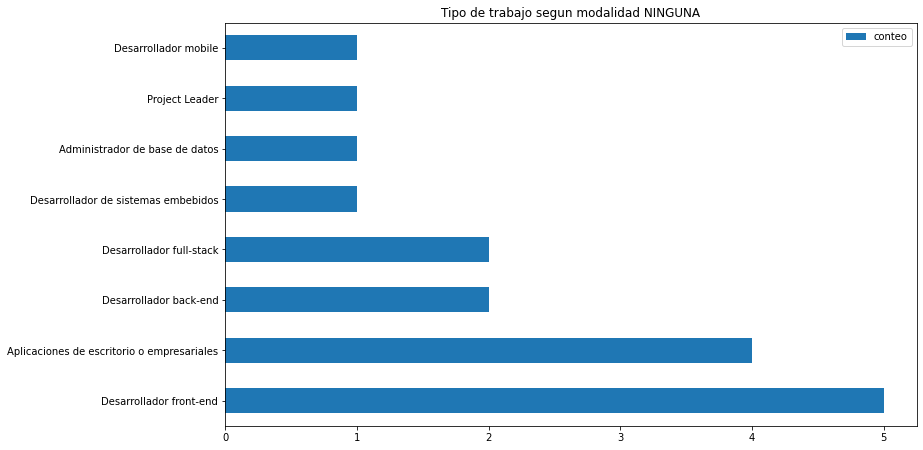

In [302]:
plt.figure() 





pd.DataFrame(
    data = tipo_trabajo_remoto.items(), 
    columns = ['trabajo','conteo']).set_index('trabajo').plot(
    kind='barh',
    title='TIpo de trabajo segun modalidad REMOTO',
    ylabel='',
    xlabel='')


pd.DataFrame(
    data = tipo_trabajo_hibrido.items(), 
    columns = ['trabajo','conteo']).set_index('trabajo').plot(
    kind='barh',
    title='Tipo de trabajo segun modalidad HIBRIDA',
    ylabel='',
    xlabel='')

pd.DataFrame(
    data = tipo_trabajo_presencial.items(), 
    columns = ['trabajo','conteo']).set_index('trabajo').plot(
    kind='barh',
    title='tipo de trabajo segun modalidad PRESENCIAL',
    ylabel='',
    xlabel='')


pd.DataFrame(
    data = tipo_trabajo_ninguna.items(), 
    columns = ['trabajo','conteo']).set_index('trabajo').plot(
    kind='barh',
    title='Tipo de trabajo segun modalidad NINGUNA',
    ylabel='',
    xlabel='')
   
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)